In [1]:
### To make Figure 3 in 3-D CMZ Paper I
# 
# Simply make a plot of different regions in CMZ, inner 100 pc, outer 100 pc, and Sgr B2
# made a version with dendrograms (CMZ_diff_regions_dendro.ipynb)
# works fine, but with multiple dendrogram structures you get weird PDF behavior, since
# each corresponds to a different column density threshold


In [33]:
from astropy.io import fits
import numpy as np
#import numpy.ma as ma
import matplotlib.pyplot as plt
import aplpy
#from math import *
#import plfit
from astropy import units as u

In [3]:
#path='/Users/battersby/Google Drive/higal_cmz/nh2_pdfs/all_fits_files/'
path='/Users/battersby/Dropbox/Work/higal_cmz/nh2_pdfs/all_fits_files/'

# A few things that are run once and only once at the end of this notebook
#Updated March 13, 2017 based on the "correct" final versions of files.
# updated again July 18, 2022

In [4]:
# Open and "flatten" relevant FITS files

hdulist1=fits.open(path+'column_properunits_conv36_source_only_gt1e22.fits')
hdu1=hdulist1[0]
dat1=hdulist1[0].data
cmz=dat1.flatten()

hdulist1=fits.open(path+'sgrb2.fits')
hdu1=hdulist1[0]
dat1=hdulist1[0].data
sgrb2=dat1.flatten()

hdulist2=fits.open(path+'r_gt_100pc.fits')
hdu2=hdulist2[0]
dat2=hdulist2[0].data
rgt=dat2.flatten()

hdulist3=fits.open(path+'r_lt_100pc.fits')
hdu3=hdulist3[0]
dat3=hdulist3[0].data
rlt=dat3.flatten()


#—> Okay, can do this, but the dendrograms do not all have the same “column cutoff”
#so we use the highest column cutoff for any dendrogram on all of them for comparison
# This is about 6 x 10^22 cm^-2 or about 10^22.8 cm^-2



# Don't need to do this anymore now... just use "zeros" one by default
#hdulist=fits.open('column_properunits_conv36_source_only_gt5e22.fits')
#hdu=hdulist[0]                              # Set hdu to data
#hdu.header                                # Print header information  

#dat=hdulist[0].data
#cmz=dat.flatten()

def replace_nans(filename,outfile):
    fh = fits.open(filename)
    fh[0].data = np.nan_to_num(fh[0].data)
    fh.writeto(outfile, clobber=True)

#replace_nans('sgrb2.fits', 'sgrb2_zeros.fits')    
#replace_nans('r_gt_100pc.fits', 'r_gt_100pc_zeros.fits')
#replace_nans('r_lt_100pc.fits', 'r_lt_100pc_zeros.fits')





<IPython.core.display.Javascript object>


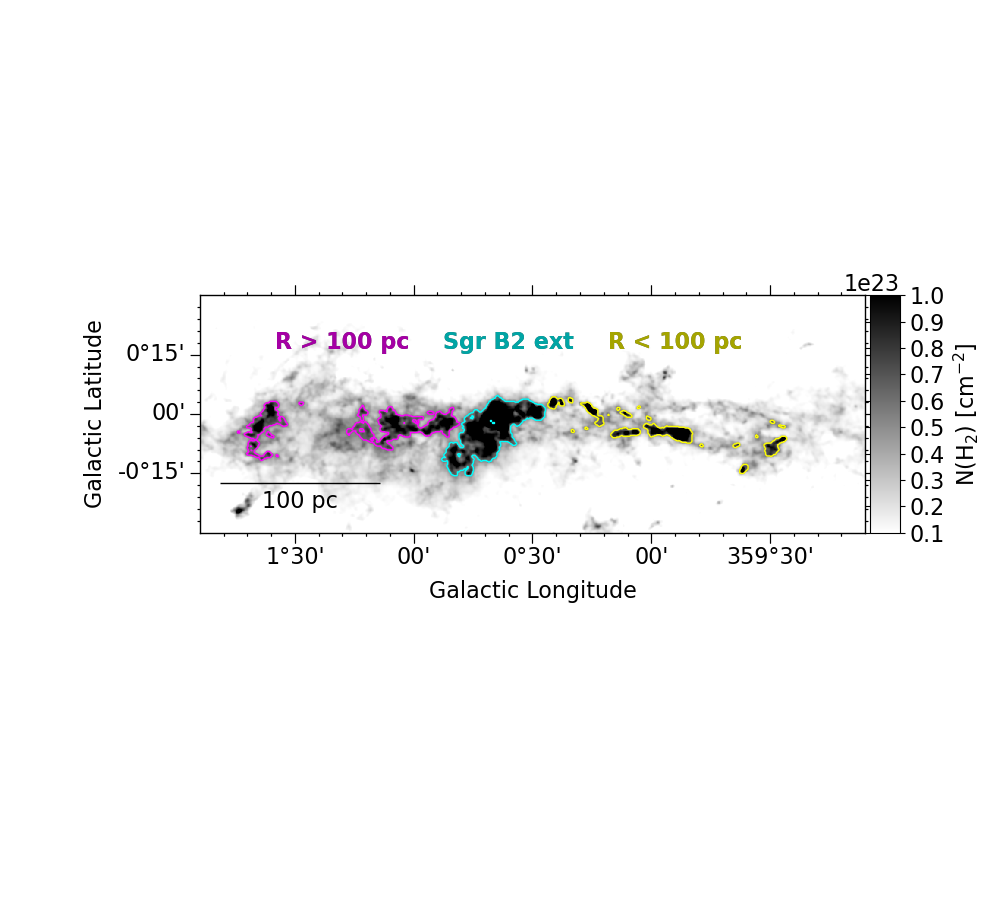

/Users/battersby/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)
/Users/battersby/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)
/Users/battersby/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


In [60]:
%matplotlib nbagg

plt.rcParams.update({'font.size': 16}) #set fontsize

fig=aplpy.FITSFigure(path+'column_properunits_conv36_source_only_gt1e22.fits')
fig.recenter(0.5,0.0, width=2.8, height=1.0)
#fig.show_colorscale(cmap=cm.inferno, vmin=1e+22,vmax=3e+23)
fig.show_colorscale(cmap='Greys_r',vmin=1e+22,vmax=1e+23)
#fig.show_colorbar()
#fig.colorbar.set_width(0.3)
fig.add_colorbar()
fig.colorbar.set_width(0.3)

fig.set_theme('publication')
#ax.coords['glon'].set_major_formatter('d.d') # maybe new option
#fig.set_tick_labels_format(xformat='ddd.d', yformat='dd.d') #stopped working
fig.colorbar.set_axis_label_text('N(H$_2$) [cm$^{-2}$]')

# ADD scale bar!
fig.add_scalebar(0.674*u.degree)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('100 pc')

fig.show_contour(path+'sgrb2.fits',linewidths=1,colors='cyan',levels=[0])
fig.show_contour(path+'r_gt_100pc.fits',linewidths=1, colors='magenta', levels=[0])
fig.show_contour(path+'r_lt_100pc.fits',linewidths=1, colors='yellow', levels=[0])
plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis
plt.gcf().subplots_adjust(left=0.2) # make room for y-axis

fig.add_label(1.30, 0.30, 'R > 100 pc', color='black',weight='bold')
fig.add_label(0.6, 0.30, 'Sgr B2 ext', color='black',weight='bold')
fig.add_label(-0.1, 0.30, 'R < 100 pc', color='black',weight='bold')
fig.add_label(1.30, 0.30, 'R > 100 pc', color='magenta',weight='bold',alpha=0.65)
fig.add_label(0.6, 0.30, 'Sgr B2 ext', color='cyan',weight='bold',alpha=0.65)
fig.add_label(-0.1, 0.30, 'R < 100 pc', color='yellow',weight='bold',alpha=0.65)

#legend = plt.legend(loc='upper right', shadow=False, fontsize=24)#'x-large')
plt.savefig('/Users/battersby/Dropbox/Work/higal_cmz/PAPER/ALL_figures/CMZ_3regions_image_v2.pdf',
            format='pdf', dpi=1000, bbox_inches='tight')
# need to save as PDF otherwise lose transparency

plt.show()



<IPython.core.display.Javascript object>


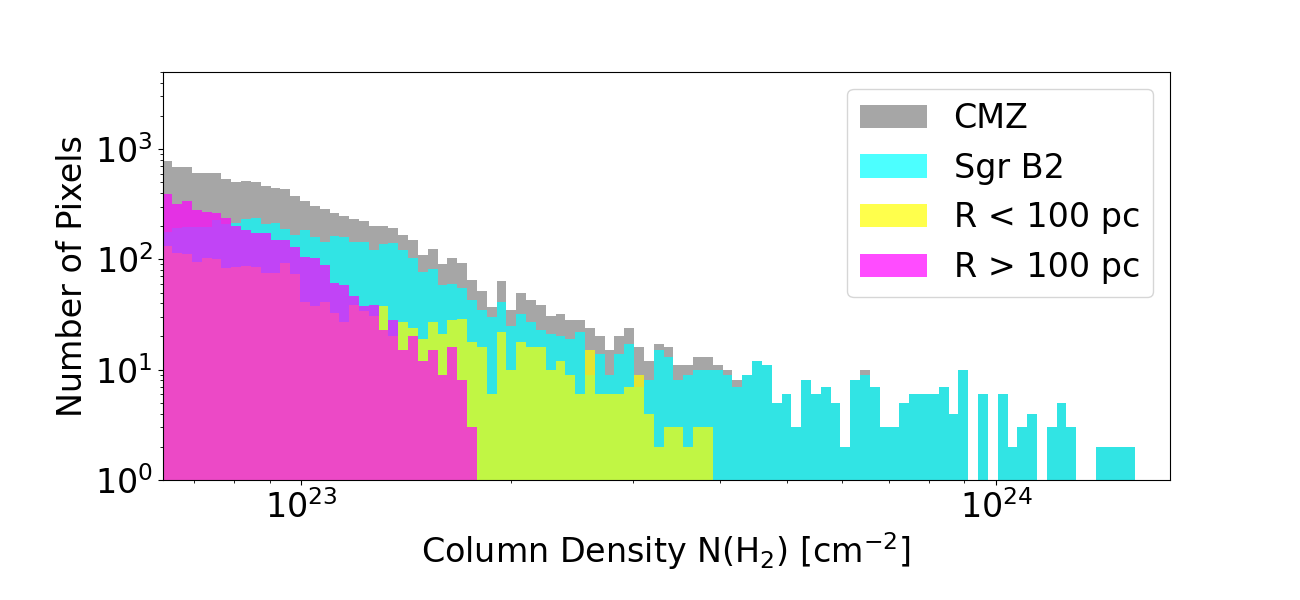

In [61]:
%matplotlib nbagg
#plt.style.use('battersbot-colorblind')
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size': 24}) #set fontsize

histogram = plt.figure(1,figsize=(13,6))
ax = histogram.gca()
plt.ylabel('Number of Pixels')
plt.xlabel('Column Density N(H$_2$) [cm$^{-2}$]')

bins = np.logspace(22.8, 24.2,100)
#bins = np.logspace(22.3, 24.2,100)
#bins = np.logspace(21.0, 24.2,100)
plt.hist(cmz, bins, color='gray',alpha=0.7, log='True', label='CMZ')
plt.hist(sgrb2, bins, color='cyan',alpha=0.7, log='True', label='Sgr B2')
plt.hist(rlt, bins, color='yellow',alpha=0.7, log='True', label='R < 100 pc')
plt.hist(rgt, bins, color='magenta',alpha=0.7, log='True', label='R > 100 pc')

#XX include more tickmarks here!

plt.gca().set_xscale("log")
ax.set_xlim(10**22.8,10**24.25)
#ax.set_xlim(10**22.3,10**24.25)
#ax.set_xlim(10**21.0,10**24.25)
#ax.set_ylim(1,1e6)
ax.set_ylim(1,5e3)
plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis

legend = plt.legend(loc='upper right', shadow=False, fontsize=24)#'x-large')


# Need to save it as a PDF, otherewise, lose transparency

plt.savefig('/Users/battersby/Dropbox/Work/higal_cmz/PAPER/ALL_figures/cmz_3regions_hist.pdf',
            format='pdf', dpi=1000, bbox_inches='tight')


plt.show()



In [9]:
a=3.5e22
print(10**(np.log10(a)))

3.5e+22


In [31]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'battersbot-colorblind', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [10]:
# Open and "flatten" relevant FITS files
# (Made in a box below)

hdulist1=fits.open(path+'temp_gt5e22.fits')
hdu1=hdulist1[0]
dat1=hdulist1[0].data
cmz_temp=dat1.flatten()

hdulist1=fits.open(path+'sgrb2_temp.fits')
hdu1=hdulist1[0]
dat1=hdulist1[0].data
sgrb2_temp=dat1.flatten()

hdulist2=fits.open(path+'r_gt_100pc_temp.fits')
hdu2=hdulist2[0]
dat2=hdulist2[0].data
rgt_temp=dat2.flatten()

hdulist3=fits.open(path+'r_lt_100pc_temp.fits')
hdu3=hdulist3[0]
dat3=hdulist3[0].data
rlt_temp=dat3.flatten()

<IPython.core.display.Javascript object>


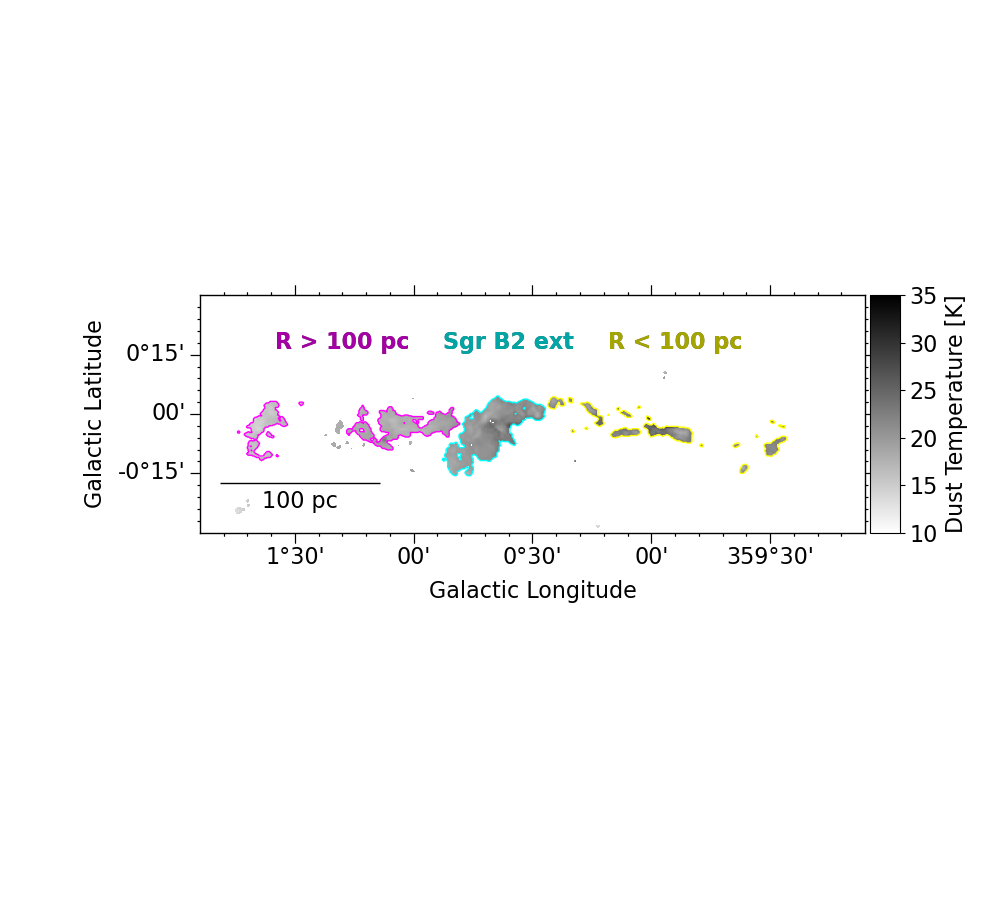

/Users/battersby/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)
/Users/battersby/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: The following kwargs were not used by contour: 'figure'
  cset = super().contour(*args, **kwargs)
/Users/battersby/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)
/Users/battersby/anaconda3/lib/python3.8/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


In [55]:
%matplotlib nbagg
plt.rcParams.update({'font.size': 16}) #set fontsize

templist=path+'temp_gt6e22.fits'

fig=aplpy.FITSFigure(templist)
fig.recenter(0.5,0.0, width=2.8, height=1.0)
#fig.show_colorscale(cmap=cm.inferno, vmin=1e+22,vmax=3e+23)
fig.show_colorscale(cmap='Greys_r',vmin=10,vmax=35)
#fig.show_colorbar()
fig.add_colorbar()
fig.colorbar.set_width(0.3)
fig.colorbar.set_axis_label_text('Dust Temperature [K]')



fig.set_theme('publication')
#fig.set_tick_labels_format(xformat='ddd.d', yformat='dd.d')

# ADD scale bar!
fig.add_scalebar(0.674*u.degree)
fig.scalebar.set_corner('bottom left')
fig.scalebar.set_label('100 pc')

# add contours
sgrb2_temp_list = fits.open(path+'sgrb2_temp.fits')
rgt100_temp_list = fits.open(path+'r_gt_100pc_temp.fits')
rlt100_temp_list = fits.open(path+'r_lt_100pc_temp.fits')

fig.show_contour(sgrb2_temp_list,0,figure=fig,linewidths=1,colors='cyan',levels=[0.0])
fig.show_contour(rgt100_temp_list,0 , linewidths=1, colors='magenta', levels=[0])
fig.show_contour(rlt100_temp_list, 0,linewidths=1, colors='yellow', levels=[0])
plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis
plt.gcf().subplots_adjust(left=0.2) # make room for y-axis


# Label regions
fig.add_label(1.30, 0.30, 'R > 100 pc', color='black',weight='bold')
fig.add_label(0.6, 0.30, 'Sgr B2 ext', color='black',weight='bold')
fig.add_label(-0.1, 0.30, 'R < 100 pc', color='black',weight='bold')
fig.add_label(1.30, 0.30, 'R > 100 pc', color='magenta',weight='bold',alpha=0.65)
fig.add_label(0.6, 0.30, 'Sgr B2 ext', color='cyan',weight='bold',alpha=0.65)
fig.add_label(-0.1, 0.30, 'R < 100 pc', color='yellow',weight='bold',alpha=0.65)


#legend = plt.legend(loc='upper right', shadow=False, fontsize=24)#'x-large')

plt.savefig('/Users/battersby/Dropbox/Work/higal_cmz/PAPER/ALL_figures/CMZ_3regions_image_temp_gt5e22.pdf',
            format='pdf', dpi=1000, bbox_inches='tight')
# need to save as PDF otherwise lose transparency


plt.show()

In [42]:
hdu0=fits.open(path+'temp_gt6e22.fits')
dat0=hdu0[0].data

print(dat0.dtype)

hdulist1=fits.open(path+'sgrb2_temp.fits')
hdu1=hdulist1[0]
dat1=hdulist1[0].data

print(dat1.dtype)

>f4
>f4


<IPython.core.display.Javascript object>


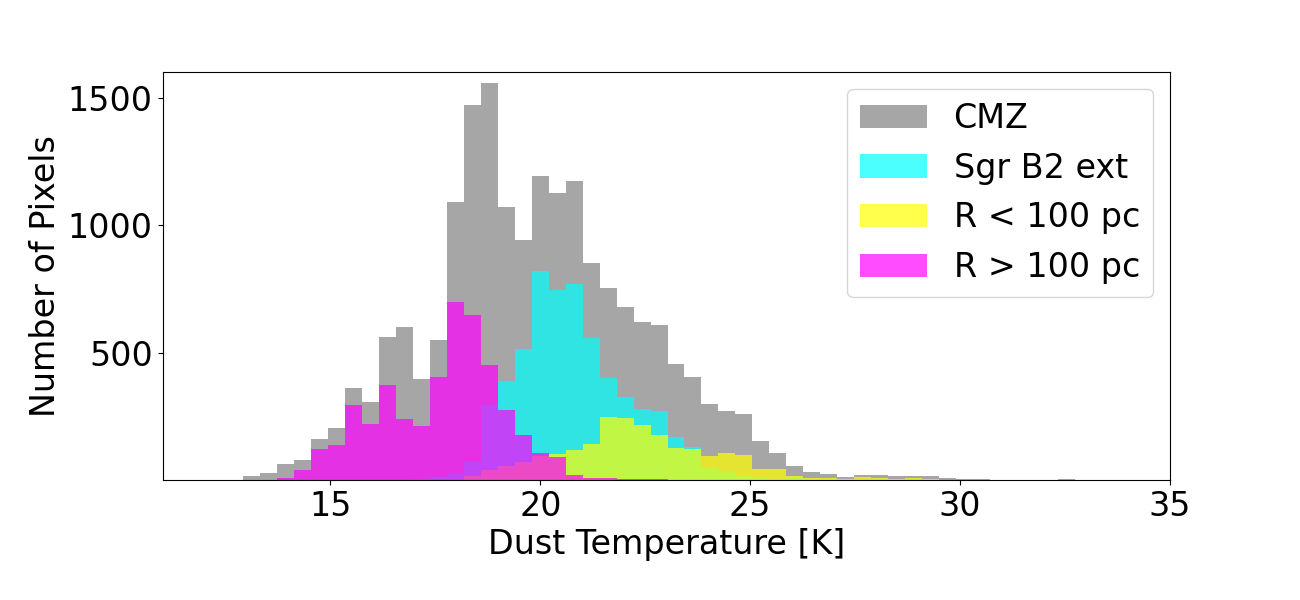

In [14]:
## LINEAR VERSION

%matplotlib nbagg
#plt.style.use('battersbot-colorblind')
plt.rcParams.update({'font.size': 24}) #set fontsize

histogram = plt.figure(1,figsize=(13,6))
ax = histogram.gca()
plt.ylabel('Number of Pixels')
plt.xlabel('Dust Temperature [K]')

#XX include more tickmarks here!

bins = np.linspace(0,40,100)
plt.hist(cmz_temp, bins, color='gray',alpha=0.7, label='CMZ')#, log='True')
plt.hist(sgrb2_temp, bins, color='cyan',alpha=0.7, label='Sgr B2 ext')#, log='True')
plt.hist(rlt_temp, bins, color='yellow',alpha=0.7, label='R < 100 pc')#, log='True')
plt.hist(rgt_temp, bins, color='magenta',alpha=0.7, label='R > 100 pc')#, log='True')

#plt.gca().set_xscale("log")
ax.set_xlim(11,35)
#ax.set_ylim(1,5000)
ax.set_ylim(1,1600)
plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis

legend = plt.legend(loc='upper right', shadow=False, fontsize=24)#'x-large')

# Need to save it as a PDF, otherewise, lose transparency
plt.savefig('/Users/battersby/Dropbox/Work/higal_cmz/PAPER/ALL_figures/cmz_3regions_hist_temp_linear.pdf',
            format='pdf', dpi=1000, bbox_inches='tight')


plt.show()



<IPython.core.display.Javascript object>


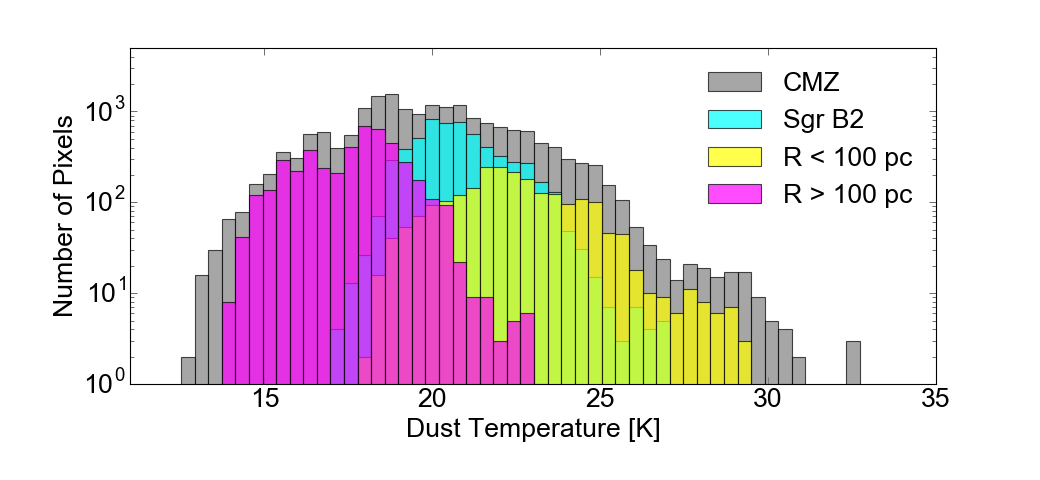

In [30]:
## LOG VERSION

%matplotlib nbagg
plt.style.use('battersbot-colorblind')
plt.rcParams.update({'font.size': 24}) #set fontsize

histogram = plt.figure(1,figsize=(13,6))
ax = histogram.gca()
plt.ylabel('Number of Pixels')
plt.xlabel('Dust Temperature [K]')

#XX include more tickmarks here!

bins = np.linspace(0,40,100)
plt.hist(cmz_temp, bins, color='gray',alpha=0.7, label='CMZ', log='True')
plt.hist(sgrb2_temp, bins, color='cyan',alpha=0.7, label='Sgr B2', log='True')
plt.hist(rlt_temp, bins, color='yellow',alpha=0.7, label='R < 100 pc', log='True')
plt.hist(rgt_temp, bins, color='magenta',alpha=0.7, label='R > 100 pc', log='True')

#plt.gca().set_xscale("log")
ax.set_xlim(11,35)
ax.set_ylim(1,5000)
plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis

legend = plt.legend(loc='upper right', shadow=False, fontsize=24)#'x-large')

# Need to save it as a PDF, otherewise, lose transparency
#plt.savefig('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/cmz_3regions_hist_temp_cmzonly.pdf',
#            format='pdf', dpi=1000, bbox_inches='tight')
plt.savefig('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/cmz_3regions_hist_temp.pdf',
            format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/cmz_3regions_hist_temp_sgrb2.pdf',
#            format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/cmz_3regions_hist_temp_rlt_100pc.pdf',
#            format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/cmz_3regions_hist_temp_rgt_100pc.pdf',
#            format='pdf', dpi=1000, bbox_inches='tight')

plt.show()




In [ ]:
# Don't think I need any  of the below anymore - saved for historical reasons?

In [27]:
## Takes a LONG time to run.

%matplotlib nbagg
plt.style.use('battersbot-colorblind')
plt.rcParams.update({'font.size': 24}) #set fontsize

#histogram = plt.figure(1,figsize=(13,6))
ax = histogram.gca()
plt.ylabel('Column')
plt.xlabel('Temp')

#bins = np.linspace(0,40,100)
#plt.scatter(cmz_temp,cmz)
plt.plot(cmz_temp, cmz, 'ro')

#plt.hist(cmz_temp, bins, color='gray',alpha=0.7, log='True', label='CMZ')
#plt.hist(sgrb2_temp, bins, color='cyan',alpha=0.7, log='True', label='Sgr B2')
#plt.hist(rlt_temp, bins, color='yellow',alpha=0.7, log='True', label='R < 100 pc')
#plt.hist(rgt_temp, bins, color='magenta',alpha=0.7, log='True', label='R > 100 pc')

#plt.gca().set_xscale("log")
ax.set_xlim(5,35)
#ax.set_ylim(1,5000)
plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis

#legend = plt.legend(loc='upper right', shadow=False, fontsize=24)#'x-large')

# Need to save it as a PDF, otherewise, lose transparency
#plt.savefig('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/cmz_3regions_hist_temp_cmzonly.pdf',
#            format='pdf', dpi=1000, bbox_inches='tight')
plt.savefig('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/cmz_NvsT.pdf',
            format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/cmz_3regions_hist_temp_sgrb2.pdf',
#            format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/cmz_3regions_hist_temp_rlt_100pc.pdf',
#            format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig('/Users/battersby/Google Drive/higal_cmz/paper_higalcmz/figures/cmz_3regions_hist_temp_rgt_100pc.pdf',
#            format='pdf', dpi=1000, bbox_inches='tight')

plt.show()


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [12]:
## Already done, only need to do this once.
# Create "column_properunits" files
# and "temp_conv36_source_only" files

# Create column density file with source only and properunits:
# column_properunits_conv36_source_only.fits
orig_file=path+'gaussfit_iter_beta175_column_gc_itervar_conv36.fits'
label_file=path+'gaussfit_iter_beta175_column_gc_itervar_conv36_label.fits'
new_file=path+'column_properunits_conv36_source_only.fits'
tempfile=path+'gaussfit_iter_beta175_temp_gc_itervar_conv36.fits'

#new=column_properunits_conv36_source_only_gt5e22.fits'

fh = fits.open(orig_file)
fh2=fits.open(label_file)

fh[0].data=(fh[0].data*fh2[0].data)*1e22 #add masks, proper units ... turn 0s to nans?
#label=fh2[0].data
#sourceonly=(column*label)*1e22 #add masks, proper units ... turn 0s to nans?

fh.writeto(new_file,clobber=True)

fh[0].data[np.where(fh[0].data < 1e22)]=0.0
fh.writeto(path+'column_properunits_conv36_source_only_gt1e22.fits',clobber=True)

fh[0].data[np.where(fh[0].data < 5e22)]=0.0
fh.writeto(path+'column_properunits_conv36_source_only_gt5e22.fits',clobber=True)

fh3 = fits.open(tempfile)
fh3[0].data=(fh3[0].data*fh2[0].data)
fh3.writeto(path+'temp_conv36_source_only.fits', clobber=True)

fh3[0].data[np.where(fh[0].data < 1e22)]=0.0
fh3.writeto(path+'temp_gt1e22.fits',clobber=True)

fh3[0].data[np.where(fh[0].data < 5e22)]=0.0
fh3.writeto(path+'temp_gt5e22.fits',clobber=True)

fh3[0].data[np.where(fh[0].data < 6e22)]=0.0
fh3.writeto(path+'temp_gt6e22.fits',clobber=True)



#fh[0].data[ypix-1,xpix-1]=np.nan
#fh.writeto(filename, clobber=True)

/Users/battersby/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in less
/Users/battersby/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in less
/Users/battersby/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in less
/Users/battersby/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in less
/Users/battersby/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in less


In [7]:
# Already did this, only need to do it once
# Create temp_gt5e22.fits file

# First for the temperature maps:
#do only above 5e22?
colfile=path+'column_properunits_conv36_source_only_gt5e22.fits'
tempfile=path+'gaussfit_iter_beta175_temp_gc_itervar_conv36.fits'

fhc=fits.open(colfile)
fht=fits.open(tempfile)

#    fh[0].data = np.nan_to_num(fh[0].data)
#    fh.writeto(outfile, clobber=True)

fhc[0].data = np.nan_to_num(fhc[0].data)
fhc[0].data[np.where(fhc[0].data>0)]=1

fht[0].data=fht[0].data*fhc[0].data

#fh[0].data=fh[0].data*fhlt[0].data
fht.writeto(path+'temp_gt5e22.fits',clobber=True)




In [7]:
# Already did this, only need to do it once
#Don't have subset regions.. need to fix! XXXX

# Now look at the temperature maps
# Create fits files for three GC regions
# In Glue, create subset masks for the rough 3 regions.  
# Do not let it cross "contour" boundaries, and exclude high latitude pixels

#previously used 5e22, but these regions require 6e22 to match dendro contours
sourcefile=path+'temp_gt6e22.fits'

# r lt 100pc
rlt_file=path+'r_lt_100pc_mask.fits'
#rlt_file=path+'r_lt_100pc_glue_subset.fits' # just a rectangle selected in glue

fh=fits.open(sourcefile)
fhlt=fits.open(rlt_file)

fh[0].data=fh[0].data*fhlt[0].data
fh.writeto(path+'r_lt_100pc_temp.fits',clobber=True)

# r gt 100pc
rlt_file=path+'r_gt_100pc_mask.fits' #from dendrograms (dendro_cmz_higal.ipynb)
#rlt_file=path+'r_gt_100pc_glue_subset.fits' # just a rectangle selected in glue

fh=fits.open(sourcefile)
fhlt=fits.open(rlt_file)

fh[0].data=fh[0].data*fhlt[0].data
fh.writeto(path+'r_gt_100pc_temp.fits',clobber=True)


# Sgr B2
rlt_file=path+'sgrb2_mask.fits' #from dendrograms (dendro_cmz_higal.ipynb)
#rlt_file=path+'sgrb2_glue_subset.fits' # just a rectangle selected in glue

fh=fits.open(sourcefile)
fhlt=fits.open(rlt_file)

fh[0].data=fh[0].data*fhlt[0].data
fh.writeto(path+'sgrb2_temp.fits',clobber=True)



In [5]:
## Already done, only need to do this once.
###CONFUSION ABOUT TWO SEPARATE FILES ... see notes_feb2017.rtf in higal_cmz folder

####
###Don't need to do anymore!!! .. these are created in dendro_cmz_higal.ipynb

# Create fits files for three GC regions
# In Glue, create subset masks for the rough 3 regions.  
# Do not let it cross "contour" boundaries, and exclude high latitude pixels
# r lt 100pc
sourcefile=path+'column_properunits_conv36_source_only_gt5e22.fits'
rlt_file=path+'/r_lt_100pc_glue_subset.fits' # just a rectangle selected in glue

fh=fits.open(sourcefile)
fhlt=fits.open(rlt_file)

fh[0].data=fh[0].data*fhlt[0].data
fh.writeto(path+'r_lt_100pc.fits',clobber=True)

# r gt 100pc
sourcefile=path+'column_properunits_conv36_source_only_gt5e22.fits'
rlt_file=path+'r_gt_100pc_glue_subset.fits' # just a rectangle selected in glue

fh=fits.open(sourcefile)
fhlt=fits.open(rlt_file)

fh[0].data=fh[0].data*fhlt[0].data
fh.writeto(path+'r_gt_100pc.fits',clobber=True)


# Sgr B2
sourcefile=path+'column_properunits_conv36_source_only_gt5e22.fits'
rlt_file=path+'sgrb2_glue_subset.fits' # just a rectangle selected in glue

fh=fits.open(sourcefile)
fhlt=fits.open(rlt_file)

fh[0].data=fh[0].data*fhlt[0].data
fh.writeto(path+'sgrb2.fits',clobber=True)


ValueError: operands could not be broadcast together with shapes (834,2226) (1230,3282) 

In [10]:
# See folder:
# ~/Google Drive/higal_cmz/nh2_pdfs/mle_fitting
# for the MLE fits ipython no